In [1]:
## Math
import numpy as np

## nd.array deep copy
import copy

## Audio Playing
from IPython.display import Audio

## Wave file save
import scipy.io.wavfile as wavfile

## Visualization
%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
def karplus_strong_naive(x, a, y_len):
    """
    Synthesizes a new waveform from an existing wavetable, modifies last sample by averaging.
    
    Parameters:
        x (list or nd.array) - initially generated signal
        a (float) - alpha
        M (int) - previous value of y
        y_len (int) - length of output signal
    
    Return:
        np.array - obtained y signal
    
    """
    x = copy.deepcopy(x)
    x_len = len(x)
   # x = np.pad(x, (0, y_len - x_len), 'constant')
    y = []
    for i in range(y_len):
        if i < x_len:
            y.insert(i, x[i])
        else:
            y.insert(i, a*y[i-x_len])
    return np.array(y)

In [5]:
def gen_signal_save_output(range_from = 1, 
                           range_to = 10, 
                           x_len = 50,
                           alpha = 0.99,
                           M = 3,
                           y_len = 32000,
                           sampling_rate = 16000,
                           path_to_save = '_outputs/'):
    """
    Parameters:
        range_from (int) - start range for random interval
        range_to (int) - end range for random interval
        x_len(int) - length of initial signal to generate
        alpha (float) - decay (or envelop)
        M (int) - previous value of y
        len_y (int) - length of output signal
        sampling_rate (int) - sampling rate which will set to write function as rate
        path_to_save (string) - relative directory wher wav file will be saved
    
    Returns:
        tuple (pair of x and y, for comparison)
    """
    
    x = np.random.randint(range_from, range_to, x_len).astype(np.float) #  np.random.randn(x_len) #
    y = karplus_strong_naive(x, alpha, y_len)
#     y = y.astype('int16')
    #print('y is', y)
#     wavfile.write(str(path_to_save) + 'y' + '.wav', 16000, y)
    
    return y

In [6]:
y = gen_signal_save_output()

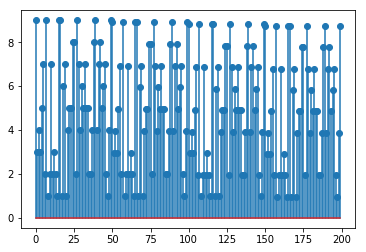

In [7]:
plt.stem(y[0:200]);

In [8]:
Audio(y, rate=16000)